In [70]:
import pandas as pd

### Load Dataset

In [71]:
day_data = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_3/Bike-Sharing-Dataset/day.csv')

### Data Wrangling

In [72]:
df_day = day_data.copy()
df_day.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [73]:
## Changing names of columns 

print(df_day.shape)
df_day = df_day.rename(columns={'dteday':'Date','season':'Season' ,'yr':'Year', 'mnth': 'Month', 
            'holiday':'Holiday', 'weekday':'Day_of_the_Week','workingday': 'Working_Day',
            'weathersit':'Weather_Situation','temp':'Temperature',
            'atemp':'Feels_like','hum':'Humidity','windspeed': 'Wind_Speed',
            'casual':'Casual_Users','registered':'Registered_Users','cnt':'Total_Users'})

df_day = df_day.drop(columns=['instant'])


(731, 16)


In [74]:
# Type Conversion of features 

df_day['Date'] = pd.to_datetime(df_day['Date'])

In [75]:
df_day = df_day.set_index('Date')
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users
Date,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [36]:
df_day.isna().sum()

Season               0
Year                 0
Month                0
Holiday              0
Day_of_the_Week      0
Working_Day          0
Weather_Situation    0
Temperature          0
Feels_like           0
Humidity             0
Wind_Speed           0
Casual_Users         0
Registered_Users     0
Total_Users          0
dtype: int64

In [37]:
df_day = df_day.drop_duplicates()

In [38]:
df_day.dtypes

Season                 int64
Year                   int64
Month                  int64
Holiday                int64
Day_of_the_Week        int64
Working_Day            int64
Weather_Situation      int64
Temperature          float64
Feels_like           float64
Humidity             float64
Wind_Speed           float64
Casual_Users           int64
Registered_Users       int64
Total_Users            int64
dtype: object

In [39]:
# Encoding values of categorical variables for EDA

In [76]:
# To check encoding of Holiday feature 
# df_day.loc['2011-07-01':'2011-07-10']

df_day.loc[df_day['Holiday'] == 0, 'Holiday'] = 'No'
df_day.loc[df_day['Holiday'] == 1, 'Holiday'] = 'Yes'

In [77]:
seasons = ['Winter','Spring','Summer','Fall']

for idx in range(len(seasons)):
    
    df_day.loc[df_day['Season'] == idx + 1, 'Season'] = seasons[idx] 

In [78]:
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

for idx in range(len(months)):
    
    df_day.loc[df_day['Month'] == idx + 1, 'Month'] = months[idx]  

In [79]:
df_day.loc[df_day['Year'] == 0, 'Year'] = 2011
df_day.loc[df_day['Year'] == 1, 'Year'] = 2012

In [80]:
df_day["is_weekend"] = df_day.Day_of_the_Week.isin([0, 6])
df_day['is_weekend'] = ['Yes' if val == True else 'No' for val in df_day['is_weekend']]

In [81]:
days_of_the_week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

for idx in range(len(days_of_the_week)):
    df_day.loc[df_day['Day_of_the_Week'] == idx, 'Day_of_the_Week'] = days_of_the_week[idx]

In [82]:
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users,is_weekend
Date,,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,No,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes
2011-01-02,Winter,2011,Jan,No,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes
2011-01-03,Winter,2011,Jan,No,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,No


In [83]:
df_day.loc[df_day['Working_Day'] == 0, 'Working_Day'] = 'No'
df_day.loc[df_day['Working_Day'] == 1, 'Working_Day'] = 'Yes'

In [84]:
weather_sit = ['partly cloudy','cloudy','light precipitation', 'heavy precipitation']

for idx in range(len(weather_sit)):
    df_day.loc[df_day['Weather_Situation'] == idx + 1, 'Weather_Situation'] = weather_sit[idx]

In [85]:
df_day['Temperature (°C)'] = (df_day.Temperature * 47) - 8
df_day['Feels_like (°C)'] = (df_day.Temperature * 50) - 16
df_day['Humidity (%)'] = df_day.Humidity * 100
df_day['Wind_Speed (km/hr)'] = df_day.Wind_Speed * 67

In [86]:
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users,is_weekend,Temperature (°C),Feels_like (°C),Humidity (%),Wind_Speed (km/hr)
Date,,,,,,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,No,Sat,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes,8.175849,1.20835,80.5833,10.749882
2011-01-02,Winter,2011,Jan,No,Sun,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes,9.083466,2.17390,69.6087,16.652113
2011-01-03,Winter,2011,Jan,No,Mon,Yes,partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,No,1.229108,-6.18180,43.7273,16.636703


### EDA

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df_day.columns

Index(['Season', 'Year', 'Month', 'Holiday', 'Day_of_the_Week', 'Working_Day',
       'Weather_Situation', 'Temperature', 'Feels_like', 'Humidity',
       'Wind_Speed', 'Casual_Users', 'Registered_Users', 'Total_Users',
       'is_weekend', 'Temperature (°C)', 'Feels_like (°C)', 'Humidity (%)',
       'Wind_Speed (km/hr)'],
      dtype='object')

In [90]:
df_day['Weather_Situation'].unique()

array(['cloudy', 'partly cloudy', 'light precipitation'], dtype=object)

/Users/tanchaud/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

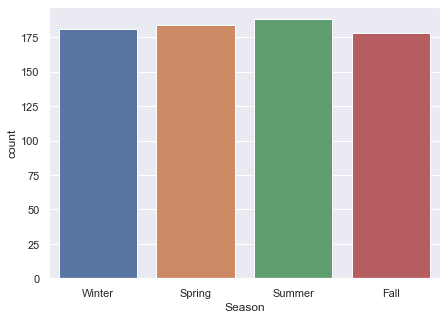

In [55]:
sns.set(rc = {'figure.figsize': (7,5)})
sns.countplot(df_day['Season'])

In [59]:
df_day.columns

Index(['Season', 'Year', 'Month', 'Holiday', 'Day_of_the_Week', 'Working_Day',
       'Weather_Situation', 'Temperature', 'Feels_like', 'Humidity',
       'Wind_Speed', 'Casual_Users', 'Registered_Users', 'Total_Users',
       'is_weekend', 'Temperature (°C)', 'Feels_like (°C)', 'Humidity (%)',
       'Wind_Speed (km/hr)'],
      dtype='object')

In [68]:
df_day.head(3)

,Season,Year,Month,Holiday,Day_of_the_Week,Working_Day,Weather_Situation,Temperature,Feels_like,Humidity,Wind_Speed,Casual_Users,Registered_Users,Total_Users,is_weekend,Temperature (°C),Feels_like (°C),Humidity (%),Wind_Speed (km/hr)
Date,,,,,,,,,,,,,,,,,,,
2011-01-01,Winter,2011,Jan,No,Sat,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Yes,8.175849,1.20835,80.5833,10.749882
2011-01-02,Winter,2011,Jan,No,Sun,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Yes,9.083466,2.17390,69.6087,16.652113
2011-01-03,Winter,2011,Jan,No,Mon,Yes,partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,No,1.229108,-6.18180,43.7273,16.636703


TypeError: The DTypes <class 'numpy.dtype[float64]'> and <class 'numpy.dtype[datetime64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

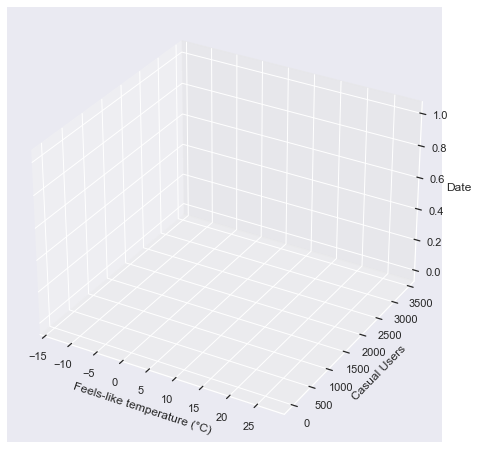

In [69]:
#### 3D SCATTER PLOT

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_day['Feels_like (°C)']
y = df_day['Casual_Users']
z = df_day.index

ax.set_xlabel("Feels-like temperature (°C)")
ax.set_ylabel("Casual Users")
ax.set_zlabel("Date")

ax.scatter(x, y, z)

plt.show()


<AxesSubplot:xlabel='Feels_like (°C)', ylabel='Casual_Users'>

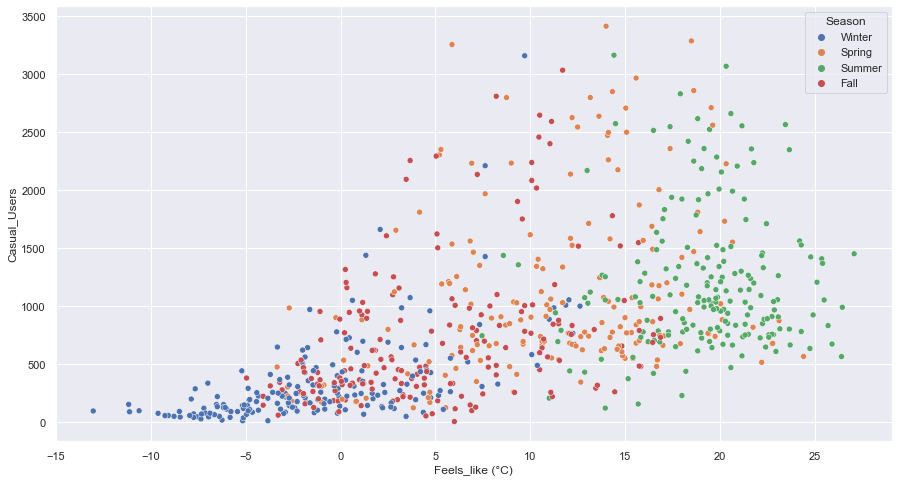

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(x=df_day['Feels_like (°C)'], y= df_day['Casual_Users'], hue = df_day['Season'])


In [61]:
df_sub = df_day['2011-03-21':'2011-06-21']

In [ ]:
#cols_plot = ['Temperature (°C)', 'Feels_like (°C)','Humidity (%)', 'Wind_Speed (km/hr)']
cols_plot = ['Casual_Users', 'Registered_Users', 'Total_Users']
axes = df_day[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Values')

In [ ]:
ax = df_day.loc['2011-05-01':'2011-08-31', 'Casual_Users'].plot()
ax.set_ylabel('Daily Values')

In [ ]:
import matplotlib.dates as mdates

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_day.loc['2011-05-01':'2011-08-31', 'Casual_Users'], marker='o', linestyle='-')
ax.set_ylabel('Daily Casual Users')
ax.set_title('May-Aug 2011 Casual Users')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))